# My goal is to find out which was the biggest raid among the population in the United States. I obtain the data from an api and start the analysis.

In [20]:
import requests
""" I request the API and enter key:value to create the query"""
query = {"Geography": "04000US06", 
"drilldowns": ["Race", "Ethnicity"],
"measures": ["Hispanic Population", "Hispanic Population Moe"]}
response = requests.get("https://datausa.io/api/data", params = query)

data = response.json()["data"]


In [2]:
response.url

'https://datausa.io/api/data?Geography=04000US06&drilldowns=Race&drilldowns=Ethnicity&measures=Hispanic+Population&measures=Hispanic+Population+Moe'

In [21]:
import pandas as pd
"""import te dataframe that i've got from API"""
df = pd.DataFrame(data)
df

,ID Race,Race,ID Ethnicity,Ethnicity,ID Year,Year,Hispanic Population,Hispanic Population Moe,Geography,ID Geography,Slug Geography
0,0,White Alone,0,Not Hispanic or Latino,2019,2019,14356081,6353.000000,California,04000US06,california
1,0,White Alone,1,Hispanic or Latino,2019,2019,9128877,65464.000000,California,04000US06,california
2,1,Black or African American Alone,0,Not Hispanic or Latino,2019,2019,2171989,16630.000000,California,04000US06,california
3,1,Black or African American Alone,1,Hispanic or Latino,2019,2019,110155,9319.000000,California,04000US06,california
4,2,American Indian & Alaska Native Alone,0,Not Hispanic or Latino,2019,2019,149063,5527.000000,California,04000US06,california
...,...,...,...,...,...,...,...,...,...,...,...
93,4,Native Hawaiian & Other Pacific Islander Alone,1,Hispanic or Latino,2013,2013,9825,2345.000000,California,04000US06,california
94,5,Some Other Race Alone,0,Not Hispanic or Latino,2013,2013,81088,8781.000000,California,04000US06,california
95,5,Some Other Race Alone,1,Hispanic or Latino,2013,2013,4880288,58658.000000,California,04000US06,california
96,6,Two or More Races,0,Not Hispanic or Latino,2013,2013,1059812,21839.574103,California,04000US06,california


In [22]:
import requests

class DataUsaClient:

    url = 'https://datausa.io/api/data'

    state_dictonaries = {'California':'04000US06',
                        'Maryland': '04000US24',
                        'Massachussets':'04000US25',
                        'New York': '04000US36'}

    def __init__(self, state):

        self.state = self.state_dictonaries[state]

    def call(self):

        query_string = {'Geography': self.state_dictonaries[state],
                        'drilldowns': ['Race', 'Ethnicity'],
                        'measures': ['Hispanic Population', 'Hispanic Population Moe']}

        r = requests.get(self.url, params = query_string)
        r.status_code
        data = r.json()['data']

        df = pd.DataFrame(data)
        return df
    """ here we made a class that allows the user to select the desired country by inserting the country's name and download the data """

In [5]:
state = input('Stato>')
client = DataUsaClient(state=state)

client.state
"""the entered state code is downloaded and goes into the querystring of the URL"""

'04000US06'

In [6]:
df = client.call()
"""here we have the call to have the relative dataframe"""

In [9]:
df

,ID Race,Race,ID Ethnicity,Ethnicity,ID Year,Year,TOT Population,TOT Population Moe,Geography,ID Geography,Slug Geography
0,0,White Alone,0,Not Hispanic or Latino,2019,2019,14356081,6353.000000,California,04000US06,california
1,0,White Alone,1,Hispanic or Latino,2019,2019,9128877,65464.000000,California,04000US06,california
2,1,Black or African American Alone,0,Not Hispanic or Latino,2019,2019,2171989,16630.000000,California,04000US06,california
3,1,Black or African American Alone,1,Hispanic or Latino,2019,2019,110155,9319.000000,California,04000US06,california
4,2,American Indian & Alaska Native Alone,0,Not Hispanic or Latino,2019,2019,149063,5527.000000,California,04000US06,california
...,...,...,...,...,...,...,...,...,...,...,...
93,4,Native Hawaiian & Other Pacific Islander Alone,1,Hispanic or Latino,2013,2013,9825,2345.000000,California,04000US06,california
94,5,Some Other Race Alone,0,Not Hispanic or Latino,2013,2013,81088,8781.000000,California,04000US06,california
95,5,Some Other Race Alone,1,Hispanic or Latino,2013,2013,4880288,58658.000000,California,04000US06,california
96,6,Two or More Races,0,Not Hispanic or Latino,2013,2013,1059812,21839.574103,California,04000US06,california


In [8]:
df.rename(columns={'Hispanic Population':'TOT Population'}, inplace = True)
df.rename(columns={'Hispanic Population Moe':'TOT Population Moe'}, inplace = True)
"""hispanic population actually indicates the total population of the united states so we rename it"""

In [10]:
double_ethnicity = df.groupby(['Ethnicity', 'Year'])['TOT Population'].sum()
double_ethnicity
"""let's do a groupby ethnicity so we can calculate the total population by years"""

Ethnicity               Year
Hispanic or Latino      2013    14719327
                        2014    14988770
                        2015    15184545
                        2016    15280776
                        2017    15477306
                        2018    15540142
                        2019    15574882
Not Hispanic or Latino  2013    23613194
                        2014    23813730
                        2015    23960273
                        2016    23969241
                        2017    24059347
                        2018    24016903
                        2019    23937341
Name: TOT Population, dtype: int64

In [11]:
df2 = double_ethnicity.reset_index()
df2

,Ethnicity,Year,TOT Population
0,Hispanic or Latino,2013,14719327
1,Hispanic or Latino,2014,14988770
2,Hispanic or Latino,2015,15184545
3,Hispanic or Latino,2016,15280776
4,Hispanic or Latino,2017,15477306
5,Hispanic or Latino,2018,15540142
6,Hispanic or Latino,2019,15574882
7,Not Hispanic or Latino,2013,23613194
8,Not Hispanic or Latino,2014,23813730
9,Not Hispanic or Latino,2015,23960273


In [12]:
df2.pivot('Year', 'Ethnicity', 'TOT Population').plot
"""first we make a pivot to reform the dataframe"""

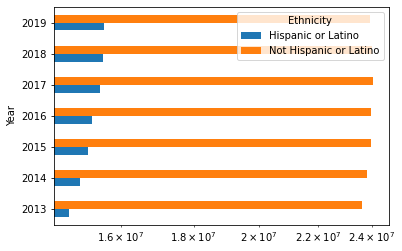

In [18]:
import matplotlib.pyplot as plt
df2.pivot('Year', 'Ethnicity', 'TOT Population').plot.barh(logx=True)
plt.savefig('hispanic_not_hispanic_barh.png')

"""As the Hispanic population is several orders of magnitude smaller than the non Hispanic, i'll need to log scale the axis to see the bars for the Hispanic population"""


In [14]:
double_ethnicity_max = df2['TOT Population'].max()
double_ethnicity_max

"""we find the largest population, so we understand which ethnicity is most populous"""

24059347

In [15]:
hispanic = df[df['Ethnicity'] == 'Hispanic or Latino'].copy()
hispanic

"""we make a dataframe only for the hispanic population"""

,ID Race,Race,ID Ethnicity,Ethnicity,ID Year,Year,TOT Population,TOT Population Moe,Geography,ID Geography,Slug Geography
1,0,White Alone,1,Hispanic or Latino,2019,2019,9128877,65464.000000,California,04000US06,california
3,1,Black or African American Alone,1,Hispanic or Latino,2019,2019,110155,9319.000000,California,04000US06,california
5,2,American Indian & Alaska Native Alone,1,Hispanic or Latino,2019,2019,172049,14097.000000,California,04000US06,california
7,3,Asian Alone,1,Hispanic or Latino,2019,2019,78724,7412.000000,California,04000US06,california
9,4,Native Hawaiian & Other Pacific Islander Alone,1,Hispanic or Latino,2019,2019,14025,2644.000000,California,04000US06,california
11,5,Some Other Race Alone,1,Hispanic or Latino,2019,2019,5317020,68648.000000,California,04000US06,california
13,6,Two or More Races,1,Hispanic or Latino,2019,2019,754032,23585.949716,California,04000US06,california
15,0,White Alone,1,Hispanic or Latino,2018,2018,9039909,66202.000000,California,04000US06,california
17,1,Black or African American Alone,1,Hispanic or Latino,2018,2018,104772,9144.000000,California,04000US06,california
19,2,American Indian & Alaska Native Alone,1,Hispanic or Latino,2018,2018,163676,11000.000000,California,04000US06,california


In [16]:
hispanic_max = hispanic['TOT Population'].max()
hispanic_max
"""we find the largest Hispanic population and the relative year"""

9128877

In [19]:
results = [
    f"The largest population between 'Hispanic or Latin' and 'Not Hispanic or Latin' is identified and found to be equal to: {(double_ethnicity_max)} that refers to 'Not Hispanic' population",
    f"In the Hispanic population, the population reaches the highest number in the year 2019 and amounted to: {(hispanic_max)}"
]
print(results)

with open("results_enea.txt", "w") as f:
    f.writelines(results)

"""we can save the results"""

["The largest population between 'Hispanic or Latin' and 'Not Hispanic or Latin' is identified and found to be equal to: 24059347 that refers to 'Not Hispanic' population", 'In the Hispanic population, the population reaches the highest number in the year 2019 and amounted to: 9128877']
